In [35]:
import numpy
import pandas
import matplotlib.pylab as plt
%matplotlib inline
import seaborn
import requests
import os

In [36]:
plt.rcParams['figure.figsize'] = 16, 9

In [82]:
# With a hint from https://stackoverflow.com/q/50703425/323100
df = pandas.read_csv('gp.csv',
                     parse_dates=['Zeit'],
                     date_parser=lambda x: pandas.Timedelta(x, format='%H:%M:%S'))

In [83]:
df['h']  = pandas.to_timedelta(df['Zeit']) / numpy.timedelta64(1, 'h')

In [84]:
df['Jahr'] = [int(date.split('-')[0]) for date in df['Datum']]

In [85]:
# Read the API key from disk
# Get your own at https://darksky.net/dev/, the first 1000 forecasts per day are free.
if os.path.exists('api.key'):
    api_key=numpy.loadtxt('api.key', dtype='str')
    load_tmp=True
else:
    print('You need to get an API key from darksky.net')
    print('Go to https://darksky.net/dev/ and save the secret key into a file "api.key" in this folder')
    load_tmp=False

In [86]:
# Where is Bern
lat_bern = '46.9478'
lon_bern = '7.4490'

Grabbing weather data, [Powered by Dark Sky](https://darksky.net/poweredby/)

In [87]:
# Grab the temperature according to https://github.com/thisss/eisheilige/blob/master/eisheilige.ipynb
debug = False
if load_tmp:
    apparenttemp = [None] * len(df)
    temp = [None] * len(df)
    icon = [None] * len(df)
    summary = [None] * len(df)
    for index, row in df.iterrows():
        if debug:
            print('Getting weather data for the GP of %s' % row['Datum'])
        # https://darksky.net/dev/docs/time-machine
        APIstring = row['Datum'] + \
            'T16:45:00' + \
            '?exclude=minutely,hourly,daily,alerts,flags' + \
            '&lang=de' + \
            '&units=si'
        if debug:
            print(APIstring)
        response = requests.get('https://api.darksky.net/forecast/%s/%s,%s,%s' % (api_key,
                                                                                  lat_bern,
                                                                                  lon_bern,
                                                                                  APIstring))
        data_bern = response.json()
        if debug:
            print(data_bern)
        apparenttemp[index] = data_bern['currently']['apparentTemperature']
        temp[index] = data_bern['currently']['temperature']
        icon[index] = data_bern['currently']['icon']
        summary[index] = data_bern['currently']['summary']
        print(u'On %s at 16:45 it was %s\u00b0 C (and felt like %s\u00b0 C). '
              'The day was "%s" or "%s"' % (row['Datum'],
                                            temp[index],
                                            apparenttemp[index],
                                            icon[index],
                                            summary[index]))
    df = df.assign(Temperature=temp)
    df = df.assign(apparentTemperature=apparenttemp)
    df = df.assign(Icon=icon)
    df = df.assign(Summary=summary)

On 2019-05-11 at 16:45 it was 13.58° C (and felt like 13.58° C). The day was "rain" or "Nieselregen und leichter Wind"
On 2017-05-13 at 16:45 it was 18.98° C (and felt like 18.98° C). The day was "partly-cloudy-day" or "Leicht bewölkt"
On 2016-05-14 at 16:45 it was 11.77° C (and felt like 11.77° C). The day was "rain" or "Leichter Regen"
On 2015-05-09 at 16:45 it was 19.19° C (and felt like 19.19° C). The day was "partly-cloudy-day" or "Leicht bewölkt"
On 2014-05-10 at 16:45 it was 19.57° C (and felt like 19.57° C). The day was "partly-cloudy-day" or "Überwiegend bewölkt"
On 2013-05-18 at 16:45 it was 19.03° C (and felt like 19.03° C). The day was "partly-cloudy-day" or "Leicht bewölkt"
On 2012-05-12 at 16:45 it was 10.17° C (and felt like 10.17° C). The day was "rain" or "Nieselregen"
On 2011-05-14 at 16:45 it was 13.09° C (and felt like 13.09° C). The day was "rain" or "Regen"
On 2010-05-22 at 16:45 it was 21.01° C (and felt like 21.01° C). The day was "clear-day" or "Klar"
On 2009-0

In [88]:
df.to_dense()

,Datum,Zeit,Link,h,Jahr,Temperature,apparentTemperature,Icon,Summary
0,2019-05-11,01:16:01,http://bern.mikatiming.de/2018/?content=detail...,1.266944,2019,13.58,13.58,rain,Nieselregen und leichter Wind
1,2017-05-13,01:14:14,http://bern.mikatiming.de/2017/?content=detail...,1.237222,2017,18.98,18.98,partly-cloudy-day,Leicht bewölkt
2,2016-05-14,01:13:35,http://bern.mikatiming.de/2016/?content=detail...,1.226389,2016,11.77,11.77,rain,Leichter Regen
3,2015-05-09,01:13:57,http://bern.mikatiming.de/2015/?content=detail...,1.232500,2015,19.19,19.19,partly-cloudy-day,Leicht bewölkt
4,2014-05-10,01:14:55,http://bern.mikatiming.de/2014/?content=detail...,1.248611,2014,19.57,19.57,partly-cloudy-day,Überwiegend bewölkt
5,2013-05-18,01:15:59,http://bern.mikatiming.de/2013/?content=detail...,1.266389,2013,19.03,19.03,partly-cloudy-day,Leicht bewölkt
6,2012-05-12,01:11:42,http://bern.mikatiming.de/2012/?content=detail...,1.195000,2012,10.17,10.17,rain,Nieselregen
7,2011-05-14,NaT,http://bern.mikatiming.de/2011/?content=detail...,NaN,2011,13.09,13.09,rain,Regen
8,2010-05-22,NaT,NaN,NaN,2010,21.01,21.01,clear-day,Klar
9,2009-04-18,01:12:39,http://bern.mikatiming.de/2009/?content=detail...,1.210833,2009,14.14,14.14,partly-cloudy-day,Überwiegend bewölkt


In [89]:
t_difference = df['h'].max() - df['h'].min()
print('Times varied by %s minutes and %s seconds' % (int(60 * t_difference),
                                                     int(60 * (60 * t_difference % int(60 * t_difference)))))

Times varied by 23 minutes and 35 seconds


In [90]:
tmp_difference = numpy.max(df['Temperature']) - numpy.min(df['Temperature'])
print(u'Temperatures varied by %0.1f\u00b0 C' % tmp_difference)

Temperatures varied by 16.2° C


In [113]:
# Drop data for years without a time
df.dropna(subset=['Zeit'], inplace=True)

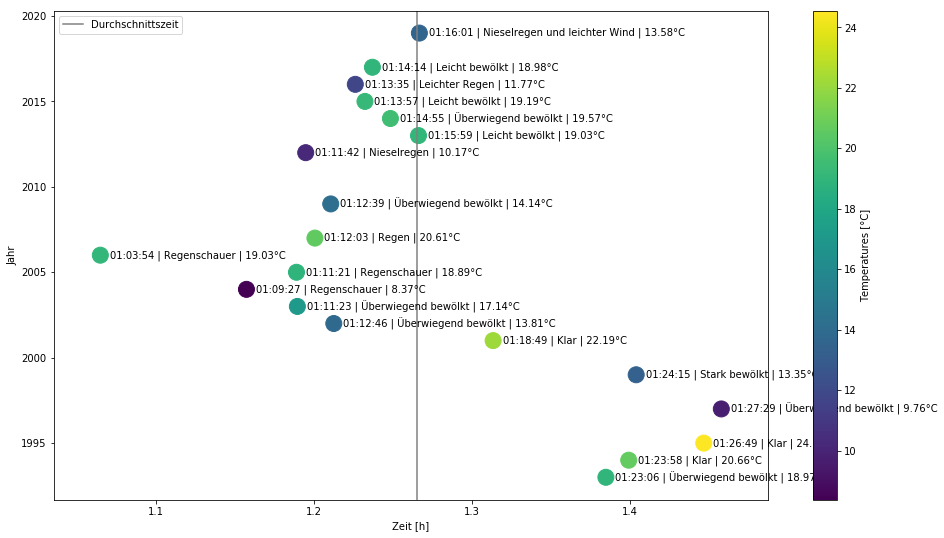

In [158]:
plt.scatter(df['h'], df['Jahr'], cmap='viridis', c=df['Temperature'], s=256, label='')
plt.axvline(numpy.nanmean(df['h']), label='Durchschnittszeit', color='gray')
for i, row in df.iterrows():
    plt.gca().annotate(u'%s | %s | %s\u00b0C' % (str(row.Zeit)[7:],
                                                 row.Summary,
                                                 row.Temperature),
                      (row.h + 0.006, row.Jahr),
                       horizontalalignment='left',
                       verticalalignment='center')
plt.colorbar(cmap='viridis', label=u'Temperatures [\u00b0C]')
plt.ylabel('Jahr')
plt.xlabel('Zeit [h]')
plt.legend(loc='upper left')
plt.savefig('zeiten.png')
plt.show()

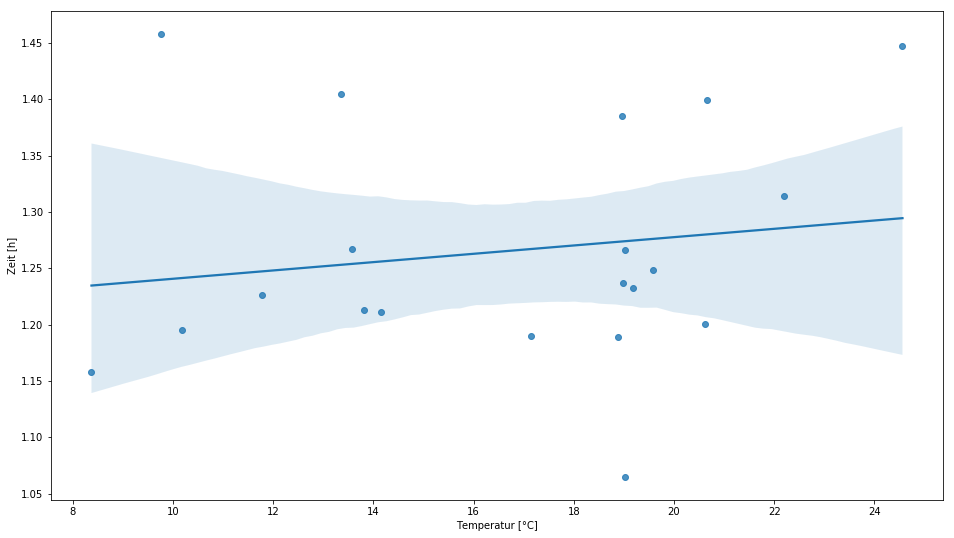

In [159]:
seaborn.regplot(df['Temperature'], df['h'], truncate=True)
plt.ylabel('Zeit [h]')
plt.xlabel(u'Temperatur [\u00b0C]')
plt.savefig('korrelation.png')
plt.show()

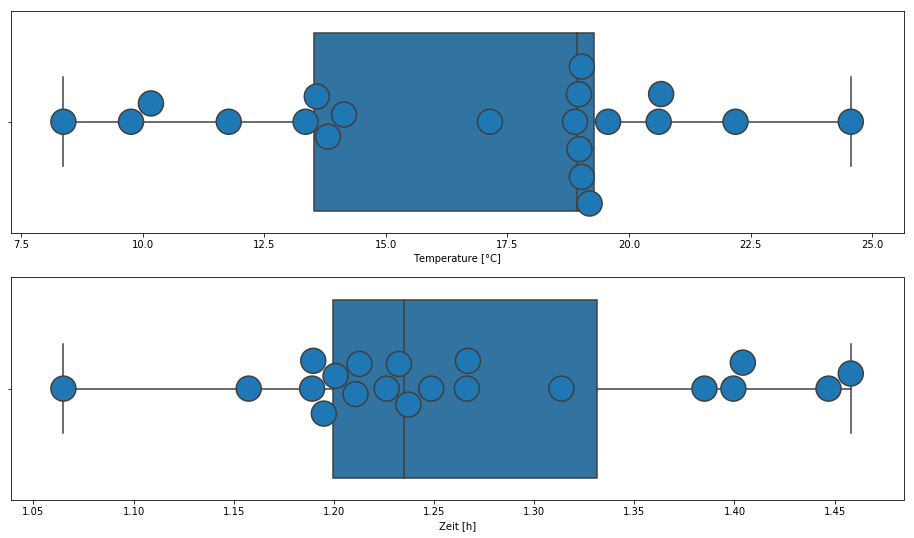

In [157]:
plt.subplot(211)
seaborn.boxplot(df['Temperature'])
seaborn.swarmplot(df['Temperature'], size=25, edgecolor='gray', linewidth=1.5)
plt.xlabel(u'Temperature [\u00b0C]')
plt.subplot(212)
seaborn.boxplot(df['h'])
seaborn.swarmplot(df['h'], size=25, edgecolor='gray', linewidth=1.5)
plt.xlabel('Zeit [h]')
plt.show()